# Time Series Visualization 

In [ ]:
import plotly.plotly as py             
import plotly.graph_objs as go


import pandas as pd                      #pandas for reading csv files
import numpy as np                       #numpy for numerical calculation 
from fbprophet import Prophet            #Prophet for forecasting data
import matplotlib.pyplot as plt          #matplotlib for plotting 



df = pd.read_csv('/home/aakash/Music/SP500.csv')
#df['y'] = np.log(df['y'])  

m = Prophet(growth='linear',weekly_seasonality=False )                         #additive regression model
m.add_seasonality(name='monthly', period=30.5, fourier_order=5).fit(df)        #train the model
                                                    
future = m.make_future_dataframe(periods=60, freq='D')          # making future dataframes  for 60 days with day frequency 
fcst = m.predict(future)                                        # predicting the values
data = [go.Scatter(
          x=future.ds,
          y=fcst.trend,
          mode = 'line',
          name = 'line')]

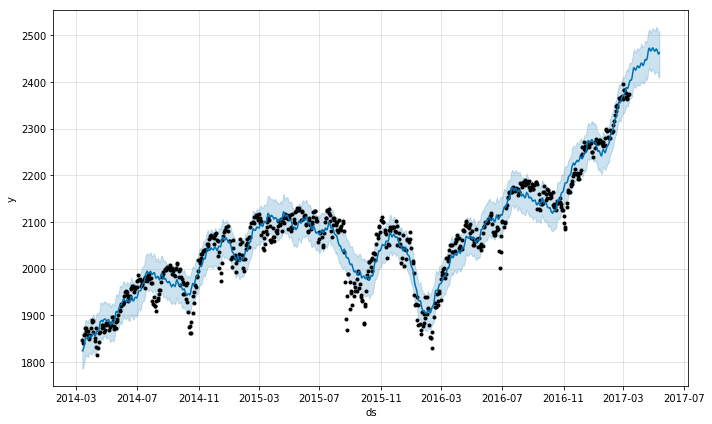

In [2]:
m.plot(fcst);                    #plotting using matplotlib

In [3]:
py.iplot(data)                #plotting using pyplot package

In [4]:
trace = go.Candlestick(x=df.ds,
                       open=fcst.trend,
                       high=fcst.yhat_upper,
                       low=fcst.yhat_lower,
                       close=fcst.yhat)
data = [trace]
py.iplot(data)                                #Candlestick map   Able to show trend high,low,close,open values


# Time Series Visualization With Log Regression of data

In [ ]:
df['y'] = np.log(df['y'])  

m = Prophet(growth='linear',weekly_seasonality=False )                         #additive regression model
m.add_seasonality(name='monthly', period=30.5, fourier_order=5).fit(df)        #train the model
                                                    
future = m.make_future_dataframe(periods=60, freq='D')          # making future dataframes  for 60 days with day frequency 
fcst = m.predict(future)                                        # predicting the values
data = [go.Scatter(
          x=future.ds,
          y=fcst.trend,
          mode = 'line',
          name = 'line')]


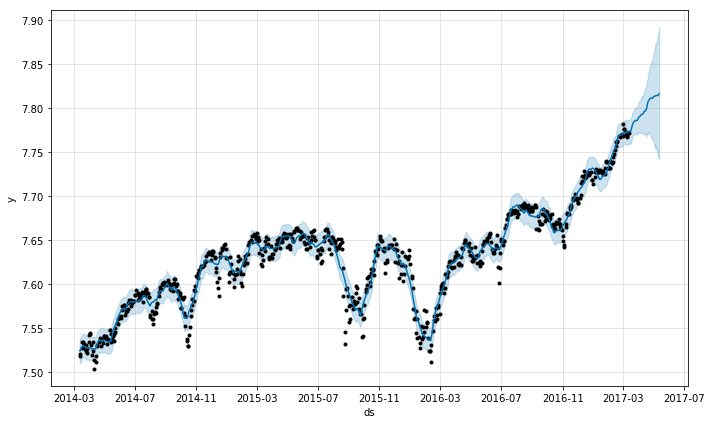

In [6]:
m.plot(fcst);                    #plotting using matplotlib

In [7]:
    py.iplot(data)                #plotting using pyplot package

In [8]:
trace = go.Candlestick(x=df.ds,
                       open=fcst.trend,
                       high=fcst.yhat_upper,
                       low=fcst.yhat_lower,
                       close=fcst.yhat)
data = [trace]
py.iplot(data) 